<h2>Python esimerkkejä</h2>

In [1]:
#pandas on data-analytiikan peruskirjasto
import pandas as pd

#matplotlib.pyplot on tarpeen kaavioiden teossa
import matplotlib.pyplot as plt

#tämän ansiosta kaaviot tulostuvat näkyviin ilman tulostuskomentoa
%matplotlib inline

In [2]:
#excel-datan avaaminen df-nimiseen dataframeen
df = pd.read_excel('http://taanila.fi/t1aineisto.xlsx')

#datan 5 ensimmäistä riviä
df.head()

,nro,1 syötkö,2 euroa,3 asiakas,4 hinta,5 radio,6 radio-ohjelma,7 uutiset,8 uutisaika,9 sanomalehti,...,19 koristeellinen,20 jousi,21 jazz,22 syntymä,23 koulutus,24 kotitalous,25 koko,26 asuinalue,27 tulot,28 sukupuoli
0,1,1,245,3,20.0,1,1.0,1,4.0,1,...,5,5,3,1968,5,2,2,2,7,2
1,2,1,110,3,11.0,1,3.0,1,4.0,1,...,1,2,4,1986,5,1,1,3,4,2
2,3,1,300,4,25.0,1,4.0,1,4.0,1,...,4,5,3,1978,6,2,2,2,7,2
3,4,1,135,3,15.0,1,3.0,1,4.0,1,...,2,1,4,1984,5,2,2,3,3,2
4,5,1,160,4,17.0,1,4.0,1,1.0,1,...,1,2,5,1981,5,2,2,3,4,1


In [3]:
#muuttujien nimet ja vastausten lukumäärät
df.count()

nro                  400
1 syötkö             400
2 euroa              400
3 asiakas            400
4 hinta              340
5 radio              400
6 radio-ohjelma      385
7 uutiset            400
8 uutisaika          356
9 sanomalehti        400
10 lehden osasto     379
11 metro             400
12 järvi             400
13 ajomatka          400
14 pukeutuminen      400
15 jälkiruoka        400
16 pääruoka          400
17 erikoisuus        400
18 yksinkertainen    400
19 koristeellinen    400
20 jousi             400
21 jazz              400
22 syntymä           400
23 koulutus          400
24 kotitalous        400
25 koko              400
26 asuinalue         400
27 tulot             400
28 sukupuoli         400
dtype: int64

In [4]:
#Luodaan uusi muuttuja, jossa vastaajat luokiteltu ei-potentiaalisiin,
#epävarmoihin ja potentiaalisiin
#Dictionary eli sanakirja aaltosulkeiden sisään
df['vastaaja'] = df['3 asiakas'].replace({1:'Ei-pot.', 2:'Ei-pot.',
                                         3:'Epävarma', 4:'Pot.', 5:'Pot.'})

In [5]:
#Lista hakasulkeiden sisään
mielipiteet = ['Täysin eri mieltä', 'Jokseenkin eri mieltä',
              'Ei samaa eikä eri mieltä', 'Jokseenkin samaa mieltä', 'Täysin samaa mieltä']

In [6]:
#Lukumääriä ja prosentteja
df1 = pd.crosstab(df['vastaaja'], 'lkm')
df1['%'] = df1/df1.sum()*100

#Devil is in the details
df1.columns.name = ''
df1.style.format({'%':'{:,.1f} %'})

,lkm,%
vastaaja,,
Ei-pot.,129,32.2 %
Epävarma,161,40.2 %
Pot.,110,27.5 %


In [7]:
#Ristiintauluikointi prosentteina
df2 = pd.crosstab(df['15 jälkiruoka'], df['vastaaja'], normalize='columns')*100

#Hyödynnetään aiemmin määriteltyä listaa
df2.index = mielipiteet

#Yhdellä desimaalilla ja prosenttimerkki perään
df2.style.format('{:,.1f} %')

vastaaja,Ei-pot.,Epävarma,Pot.
Täysin eri mieltä,59.7 %,49.7 %,1.8 %
Jokseenkin eri mieltä,31.8 %,37.3 %,2.7 %
Ei samaa eikä eri mieltä,3.1 %,8.1 %,0.0 %
Jokseenkin samaa mieltä,1.6 %,2.5 %,44.5 %
Täysin samaa mieltä,3.9 %,2.5 %,50.9 %


In [8]:
#Tilastollisia tunnuslukuja (T kääntää taulukon toisin päin)
df3 = df.groupby(['vastaaja'])['4 hinta'].describe().T

#Yhdellä desimaalilla
df3.style.format('{:,.1f}')

vastaaja,Ei-pot.,Epävarma,Pot.
count,72.0,158.0,110.0
mean,11.4,14.3,30.2
std,4.3,3.0,8.8
min,6.0,7.0,11.0
25%,8.0,12.0,24.0
50%,10.0,14.0,28.0
75%,13.2,16.0,35.0
max,26.0,23.0,60.0


Text(0,0.5,'Lukumäärä')

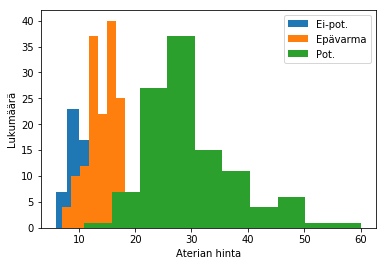

In [9]:
df.groupby(['vastaaja'])['4 hinta'].plot.hist()
plt.legend()
plt.xlabel('Aterian hinta')
plt.ylabel('Lukumäärä')